## Learning by Repeating Topical Data Analysis

### 1. Influenza national summary (green and yellow chart)

Warning message:
“Removed 16 rows containing missing values (position_stack).”Warning message:
“Removed 16 rows containing missing values (position_stack).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”

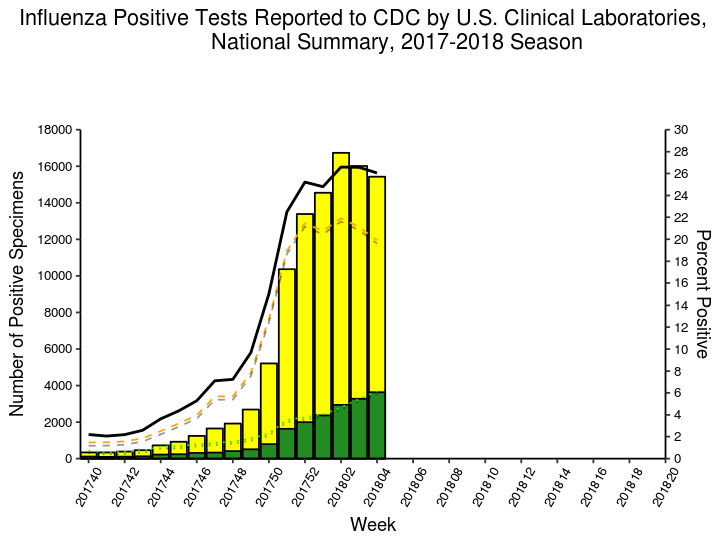

In [146]:
library(ggplot2)
library(repr)
options(repr.plot.width=6, repr.plot.height=4.5)
Nationalsummary <- read.csv("../data/National-Summary.csv")
# Nationalsummary$Week <- as.integer(Nationalsummary$Week)
Nationalsummary$Week <- factor(Nationalsummary$Week)
# Nationalsummary$Week <- numeric(as.character(Nationalsummary$Week))
g <- ggplot(Nationalsummary, aes(x=Week))+
geom_bar(aes(y=Total.B+Total.A),stat = "identity", fill = "yellow", color = "black", )+
geom_bar(aes(y=Total.B),stat = "identity", fill = "#228B22", color = "black")+
geom_line(aes(y=X..Positive*18000/30, group =1), colour= "black", size=0.8)+
geom_line(aes(y=Percent.Positive.A*18000/30, group =1), colour= "orange", linetype = 2, size=0.5)+
geom_line(aes(y=(Percent.Positive.A-0.3)*18000/30, group =1), colour= "black", linetype = 2, size=0.5, alpha="0.4")+
geom_line(aes(y=Percent.Positive.B*18000/30, group =1), colour= "green", linetype = "dotted", size=0.5)+
geom_line(aes(y=(Percent.Positive.B-0.2)*18000/30, group =1), colour= "black", linetype = "dotted", size=0.5, alpha="0.4")+

labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n National Summary, 2017-2018 Season\n\n\n")+
scale_y_continuous(expand = c(0,0),name="Number of Positive Specimens",sec.axis = sec_axis(~ . * 30 / 18000, name = "Percent Positive", breaks=seq(0,30, by=2)), breaks=seq(0,18000, by=2000))+
scale_x_discrete(expand = c(0,0), breaks=seq(201740,201820, by=2))+
coord_cartesian(ylim = c(0, 18000))+
theme_classic()+
theme(axis.text.x = element_text( color="black",size=8, angle=60, vjust=0.5),
        axis.text.y = element_text( color="black",size=8),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "black"),
     plot.title = element_text(size=13, hjust=0.6),
     legend.position = "bottom")
g

### 2. Influenza national summary (green and yellow chart)

Warning message:
“Removed 112 rows containing missing values (position_stack).”

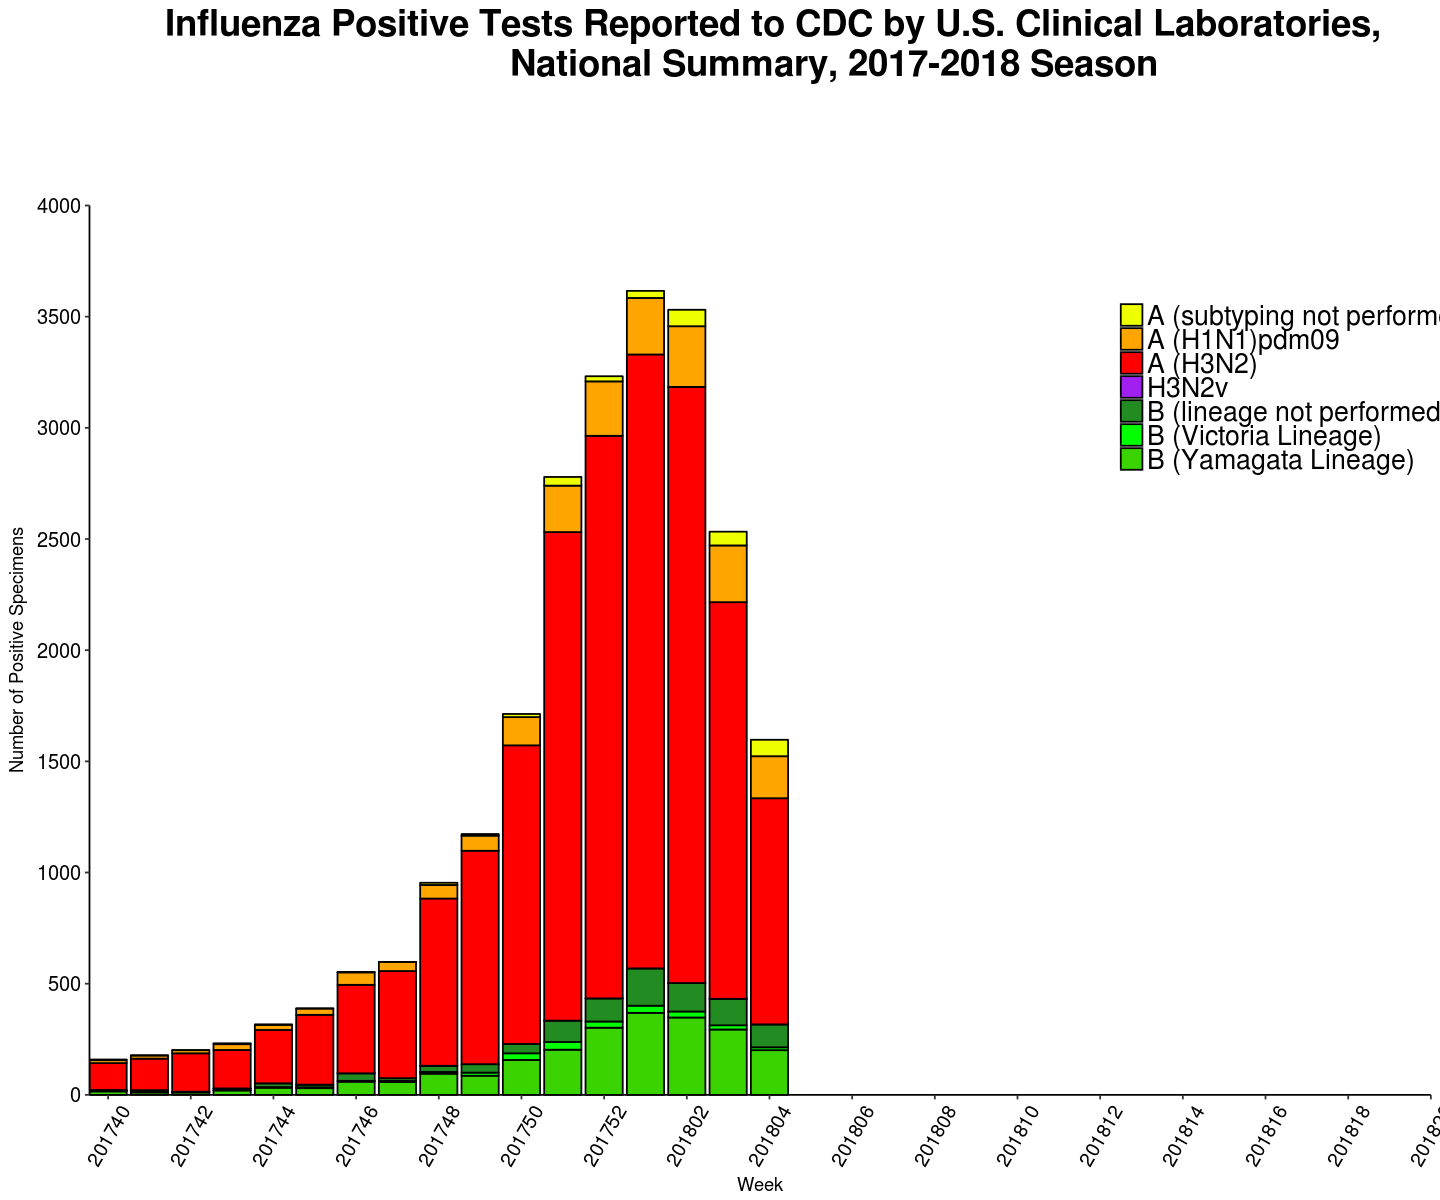

In [316]:
library(ggplot2)
library(repr)
library(reshape2)
# options(repr.plot.width=12, repr.plot.height=10)
positiveTest <- read.csv("../data/positive1.csv")
# summary(positiveTest)
# positiveTest$Week <- c(positiveTest$Week, 201804:201820)
positiveTest$Week <- factor(positiveTest$Week)
# positiveTest$Week <- as.numeric(positiveTest$Week)
stacked <- melt(positiveTest, id.vars = "Week", measure.vars=c("ASNP","AH1N1pdm09", "AH3", "AH3N2v", "B", "BVIC", "BYAM"))
# stacked
# positiveTest$Week <- numeric(as.character(positiveTest$Week))
fill <- c("#eeff00", "orange", "red","purple","#228B22","green","#3bd300")
pos <- ggplot(stacked, aes(Week, value, fill = variable)) +
    geom_bar(stat = "identity", color="black") +
    scale_y_continuous(expand = c(0,0),name="Number of Positive Specimens", breaks=seq(0,4000, by=500))+
scale_x_discrete(expand = c(0,0), breaks=seq(201740,201820, by=2))+
coord_cartesian(ylim = c(0, 4000))+
scale_fill_manual(values=fill, guide = guide_legend(title = NULL), 
                 labels=c("A (subtyping not performed)", "A (H1N1)pdm09", "A (H3N2)", "H3N2v", "B (lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"))+
# scale_color_manual(values="black")+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n National Summary, 2017-2018 Season\n\n\n")+
theme_classic()+
theme(axis.text.x = element_text( color="black",size=12, angle=60, vjust=0.5),
        axis.text.y = element_text( color="black",size=12),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "black"),
     plot.title = element_text(face="bold",size=22, hjust=0.6),
     legend.text = element_text(size = 16),
     legend.position = c(.90, .80),
     legend.key.height=unit(1,"line"),
     legend.key.width=unit(1,"line"))
pos